# Prática: Agrupamento de Personagens dos Simpsons com K-Means

**Objetivo:** Aplicar o algoritmo de agrupamento **K-Means** sobre um conjunto de dados sintéticos inspirados nos personagens da série "Os Simpsons".

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Dados simulados
personagens = [
    'Homer', 'Marge', 'Bart', 'Lisa', 'Maggie',
    'Ned Flanders', 'Milhouse', 'Mr. Burns', 'Apu', 'Nelson'
]

dados = pd.DataFrame({
    'personagem': personagens,
    'idade': [39, 36, 10, 8, 1, 60, 10, 104, 40, 12],
    'peso': [120, 60, 35, 25, 10, 70, 30, 50, 65, 50],
    'altura': [1.82, 1.75, 1.40, 1.20, 0.70, 1.80, 1.45, 1.65, 1.70, 1.50],
    'inteligencia': [3, 6, 4, 10, 2, 7, 5, 9, 6, 3],
    'preguiça': [9, 4, 6, 2, 5, 3, 5, 1, 5, 7]
})

# Exibir os dados
dados

,personagem,idade,peso,altura,inteligencia,preguiça
0,Homer,39,120,1.82,3,9
1,Marge,36,60,1.75,6,4
2,Bart,10,35,1.40,4,6
3,Lisa,8,25,1.20,10,2
4,Maggie,1,10,0.70,2,5
5,Ned Flanders,60,70,1.80,7,3
6,Milhouse,10,30,1.45,5,5
7,Mr. Burns,104,50,1.65,9,1
8,Apu,40,65,1.70,6,5
9,Nelson,12,50,1.50,3,7


## Pré-processamento dos dados
Removemos a coluna `personagem` e normalizamos os dados numéricos.

In [3]:
from sklearn.preprocessing import StandardScaler

X = dados.drop('personagem', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_scaled

array([[ 0.23330741,  2.35612312,  0.99217554, -1.        ,  1.92109832],
       [ 0.13331852,  0.29236564,  0.77715298,  0.2       , -0.31273694],
       [-0.73325187, -0.56753331, -0.29795984, -0.6       ,  0.58079717],
       [-0.79991113, -0.91149289, -0.91231002,  1.8       , -1.20627104],
       [-1.03321854, -1.42743226, -2.44818546, -1.4       ,  0.13403012],
       [ 0.93322965,  0.63632522,  0.93074052,  0.6       , -0.75950399],
       [-0.73325187, -0.7395131 , -0.14437229, -0.2       ,  0.13403012],
       [ 2.39973338, -0.05159394,  0.46997789,  1.4       , -1.65303809],
       [ 0.26663704,  0.46434543,  0.62356543,  0.2       ,  0.13403012],
       [-0.6665926 , -0.05159394,  0.00921525, -1.        ,  1.02756422]])

##  Aplicação do K-Means
Executamos o K-Means com `k=3` para descobrir 3 grupos nos dados.

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
dados['grupo'] = kmeans.fit_predict(X_scaled)
dados

,personagem,idade,peso,altura,inteligencia,preguiça,grupo
0,Homer,39,120,1.82,3,9,2
1,Marge,36,60,1.75,6,4,1
2,Bart,10,35,1.40,4,6,1
3,Lisa,8,25,1.20,10,2,0
4,Maggie,1,10,0.70,2,5,1
5,Ned Flanders,60,70,1.80,7,3,3
6,Milhouse,10,30,1.45,5,5,1
7,Mr. Burns,104,50,1.65,9,1,3
8,Apu,40,65,1.70,6,5,1
9,Nelson,12,50,1.50,3,7,1


##  Visualização dos Grupos
Visualizamos os personagens usando os atributos `inteligencia` e `preguiça`.

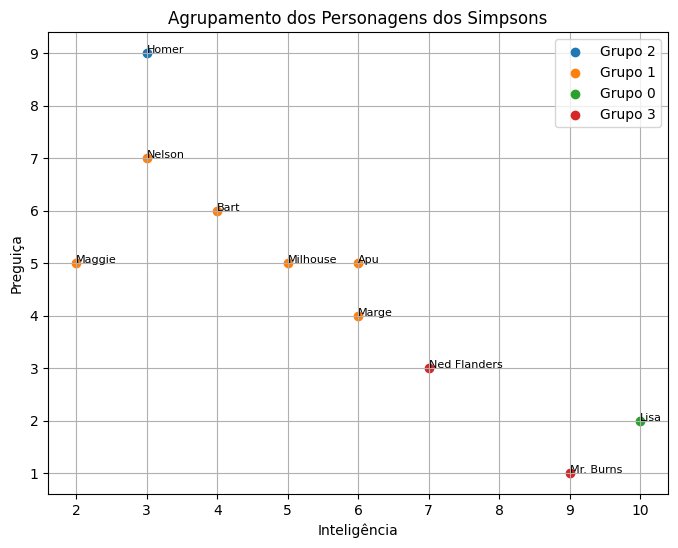

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for g in dados['grupo'].unique():
    grupo = dados[dados['grupo'] == g]
    plt.scatter(grupo['inteligencia'], grupo['preguiça'], label=f'Grupo {g}')
    for i, row in grupo.iterrows():
        plt.text(row['inteligencia'], row['preguiça'], row['personagem'], fontsize=8)

plt.xlabel('Inteligência')
plt.ylabel('Preguiça')
plt.legend()
plt.title('Agrupamento dos Personagens dos Simpsons')
plt.grid(True)
plt.show()

In [16]:
# Obter os centróides no espaço normalizado
centroides_normalizados = kmeans.cluster_centers_

# Desnormalizar os centróides para os valores reais
centroides = scaler.inverse_transform(centroides_normalizados)

# Criar um DataFrame com os centroides
colunas = X.columns
df_centroides = pd.DataFrame(centroides, columns=colunas)
df_centroides['grupo'] = range(len(df_centroides))

# Exibir os centroides desnormalizados
df_centroides


,idade,peso,altura,inteligencia,preguiça,grupo
0,8.000000,25.000000,1.200000,10.000000,2.000000,0
1,18.166667,41.666667,1.416667,4.333333,5.333333,1
2,39.000000,120.000000,1.820000,3.000000,9.000000,2
3,82.000000,60.000000,1.725000,8.000000,2.000000,3


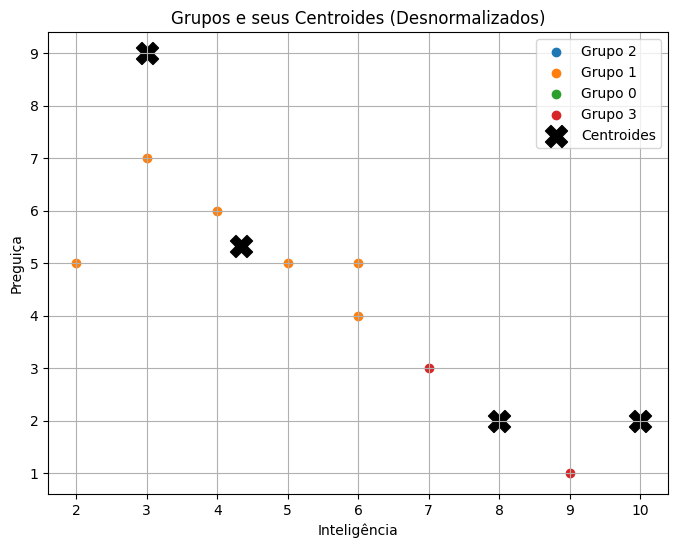

In [17]:
# Visualizar os centroides junto com os dados (ex: inteligencia vs preguiça)
plt.figure(figsize=(8,6))

# Grupos
for g in dados['grupo'].unique():
    grupo = dados[dados['grupo'] == g]
    plt.scatter(grupo['inteligencia'], grupo['preguiça'], label=f'Grupo {g}')

# Centroides
plt.scatter(df_centroides['inteligencia'], df_centroides['preguiça'],
            s=250, c='black', marker='X', label='Centroides')

plt.xlabel('Inteligência')
plt.ylabel('Preguiça')
plt.legend()
plt.title('Grupos e seus Centroides (Desnormalizados)')
plt.grid(True)
plt.show()


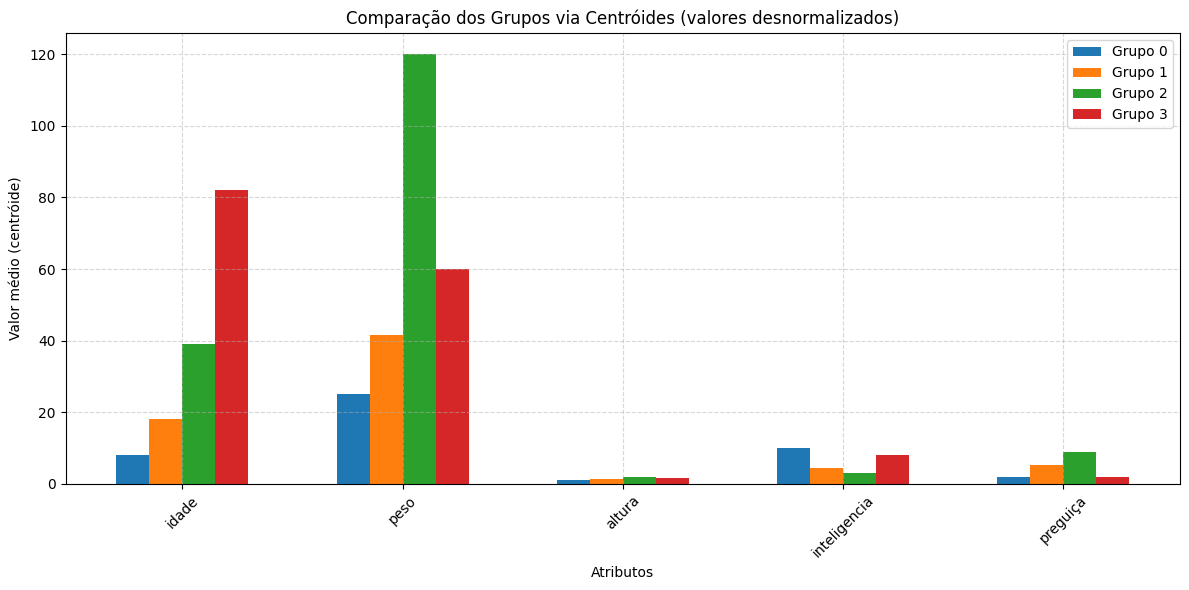

In [18]:
# Recriação dos centroides desnormalizados
centroides_normalizados = kmeans.cluster_centers_
centroides = scaler.inverse_transform(centroides_normalizados)
colunas = X.columns
df_centroides = pd.DataFrame(centroides, columns=colunas)
df_centroides['grupo'] = range(len(df_centroides))

# Gerar gráfico de barras agrupadas
import matplotlib.pyplot as plt
import numpy as np

df_centroides_plot = df_centroides.drop('grupo', axis=1)
atributos = df_centroides_plot.columns
num_grupos = df_centroides.shape[0]

fig, ax = plt.subplots(figsize=(12, 6))
largura_barra = 0.15
indices = np.arange(len(atributos))

for i in range(num_grupos):
    valores = df_centroides_plot.iloc[i].values
    ax.bar(indices + i * largura_barra, valores, largura_barra, label=f'Grupo {i}')

ax.set_xlabel('Atributos')
ax.set_ylabel('Valor médio (centróide)')
ax.set_title('Comparação dos Grupos via Centróides (valores desnormalizados)')
ax.set_xticks(indices + largura_barra * (num_grupos - 1) / 2)
ax.set_xticklabels(atributos, rotation=45)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##  Questões:

1. Qual foi o critério usado pelo algoritmo para formar os grupos?
Resp.: Preguiça e inteligência
2. Troque o valor de `k` para `2` e `4`. Os grupos mudam? Qual valor parece melhor?
3. Experimente usar apenas alguns atributos (ex: apenas altura e peso). O resultado muda?

##  Analise
- Como a **escolha dos atributos** e o **valor de k** afetam os agrupamentos?
- O resultado condiz com a **nossa percepção subjetiva** dos personagens?
- Como você escolheria o melhor valor de `k` de forma automatizada?